In [21]:
from sr_tiny_radar_loader import get_sr_tiny_radar_data_loader
import numpy as np
import matplotlib.pyplot as plt

In [22]:
gestures = [
    "PinchIndex",
    "PinchPinky",
    # "FingerSlider",
    # "FingerRub",
    # "SlowSwipeRL",
    # "FastSwipeRL",
    # "Push",
    # "Pull",
    # "PalmTilt",
    # "Circle",
    # "PalmHold",
    # "NoHand",
]
persons = 14
people = list(range(1, persons, 1))

# Dataset parameters
numberOfTimeSteps = 5
numberOfSensors = 2
numberOfRangePointsPerSensor = 492
numberOfInstanceWindows = 3
lengthOfSubWindow = 32
numberOfGestures = 12
batch_size = 128
epochs = 150
data_dir ="/Users/netanelblumenfeld/Desktop/data/11G/"

# paths
row = 8
col = 64
hight_res_folder = "data_feat/"
low_res_folder = f"data_feat_ds_row_{row}_col_{col}_d_none_u_cubic/"
hight_res__path = data_dir + hight_res_folder
low_res_path = data_dir + low_res_folder

training_generator, val_generator = get_sr_tiny_radar_data_loader(
    low_res_path,
    hight_res__path,
    people,
    gestures,
    batch_size,
    scale=True,
)

Doing 1
Doing 2
Doing 3
Doing 4
Doing 5
Doing 6
Doing 7
Doing 8
Doing 9
Doing 10
Doing 11
Doing 12
Doing 13


In [23]:
for a , b in training_generator:
    print(a.shape)
    print(b[0].shape)
    print(b[1].shape)
    break

torch.Size([128, 5, 2, 32, 492])
torch.Size([128, 5, 2, 32, 492])
torch.Size([128, 5])


In [24]:
aa = a[0,0,0].numpy()
bb = b[0][0,0,0].numpy()

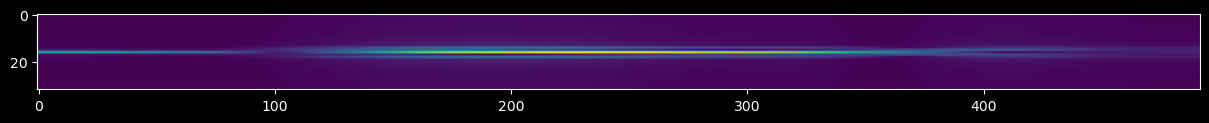

In [29]:
plt.figure(figsize=(15,15))
plt.imshow(aa)

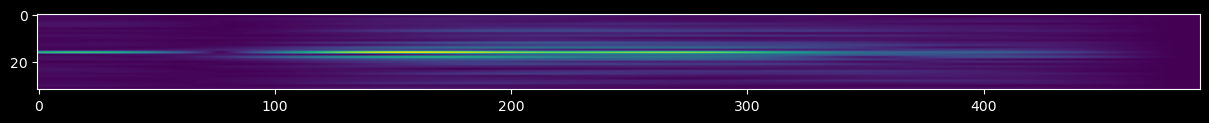

In [31]:
plt.figure(figsize=(15,15))
plt.imshow(bb)
